# MNIST and Fashion-MNIST

MNIST is a famous dataset of handwritten digits. Fashion-MNIST is a dataset that is very similar to MNIST, both consist of 28 by 28 images, but instead of digits, Fashion-MNIST has pieces of clothing, which are a bit harder to classify.

We will use these datasets to benchmark our batch selection algorithm on a CNN.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import os

# Both MNIST and Fashion-MNIST can be loaded from Keras.
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# By default the pixels in the images are encoded as a number between 0 and 255, we want them to be a float between 0 and 1.
print( x_train.shape )
print( x_train[0][10])
# The labels are a number between 0 and 9.
print( y_train.shape )
print( y_train[0])

(60000, 28, 28)
[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
(60000,)
5


In [3]:
# Convert image pixels to floats between 0 and 1
X_train = x_train / 255
X_test = x_test / 255

# Convert output to one hot encoding
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)

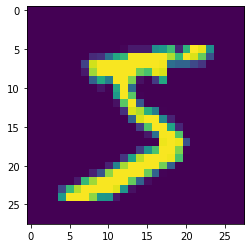

Label: 5


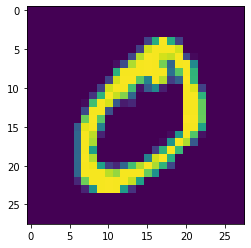

Label: 0


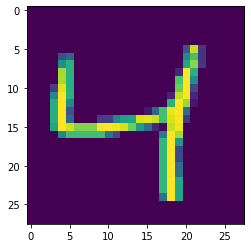

Label: 4


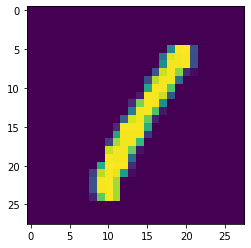

Label: 1


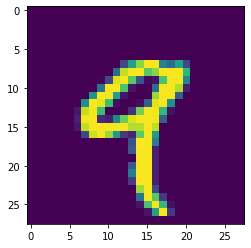

Label: 9


In [4]:
# If we look at some of the data, we can see that they are indeed handwritten digits.
for i in range( 0, 5 ):
    plt.imshow( x_train[i] )
    plt.show()
    print( "Label: " + str(y_train[i]) )

In [5]:
# We can see that we have roughly the same amount from every digit.
unique, counts = np.unique(y_train, return_counts=True)
print( np.asarray((unique, counts)).T )

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


In [6]:
# Save dataset to file.
path = 'data/mnist'
np.save(os.path.join(path, 'mnist_train_vectors'), X_train)
np.save(os.path.join(path, 'mnist_test_vectors'), X_test)
np.save(os.path.join(path, 'mnist_train_labels'), Y_train)
np.save(os.path.join(path, 'mnist_test_labels'), Y_test)

## Fashion MNIST

Because the structure of this dataset is the same as MNIST, we can load it the same way.

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# The labels are numbers between 0 and 9, each meaning a certain type of clothing.
fashion_label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
         

In [8]:
X_train = x_train / 255
X_test = x_test / 255

Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)

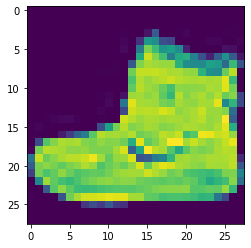

Label: Ankle boot


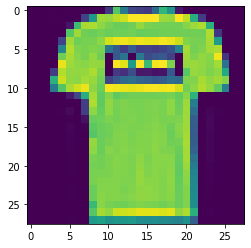

Label: T-shirt/top


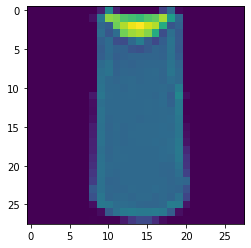

Label: T-shirt/top


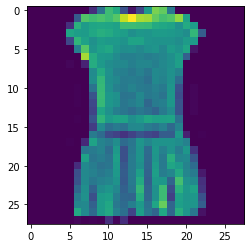

Label: Dress


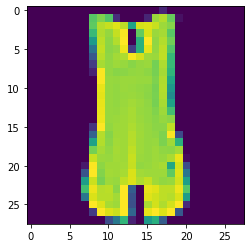

Label: T-shirt/top


In [9]:
# We can see that the images are of clothes.
for i in range( 0, 5 ):
    plt.imshow( x_train[i] )
    plt.show()
    print( "Label: " + str(fashion_label_names[y_train[i]]) )

In [10]:
# The count of every clothing type in the training data is exactly the same.
unique, counts = np.unique(y_train, return_counts=True)
print( np.asarray((unique, counts)).T )

[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]


In [11]:
# Save dataset to file.
path = 'data/fashion_mnist'
np.save(os.path.join(path, 'fashion_mnist_train_vectors'), X_train)
np.save(os.path.join(path, 'fashion_mnist_test_vectors'), X_test)
np.save(os.path.join(path, 'fashion_mnist_train_labels'), Y_train)
np.save(os.path.join(path, 'fashion_mnist_test_labels'), Y_test)